In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [4]:
sample_a

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A
...,...,...,...,...,...
61566,2020-11-23,9.986289e+08,0,0,A
61567,2020-11-23,9.989196e+08,0,0,A
61568,2020-11-23,9.990631e+08,0,0,A
61569,2020-11-23,9.994210e+07,0,0,A


In [5]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')

In [6]:
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [7]:
daily_a = sample_a.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'user_count'})
daily_a.head()

,date,user_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [8]:
daily_b = sample_b.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'user_count'})
daily_b.head()

,date,user_count,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


In [9]:
daily_a[daily_a['date'] == '2020-11-08']

,date,user_count,transactions,revenue
2,2020-11-08,3354,25,846051


In [10]:
daily_a['cum_user_count'] = daily_a['user_count'].cumsum()
daily_a['cum_transaction'] = daily_a['transactions'].cumsum()
daily_a['cum_revenue'] = daily_a['revenue'].cumsum()
daily_a['cum_converce'] = daily_a['cum_transaction'] / daily_a['cum_user_count'] * 100
daily_a['cum_av_rev'] = daily_a['cum_revenue'] / daily_a['cum_transaction']

In [11]:
daily_b['cum_user_count'] = daily_b['user_count'].cumsum()
daily_b['cum_transaction'] = daily_b['transactions'].cumsum()
daily_b['cum_revenue'] = daily_b['revenue'].cumsum()
daily_b['cum_converce'] = daily_b['cum_transaction'] / daily_b['cum_user_count'] * 100
daily_b['cum_av_rev'] = daily_b['cum_revenue'] / daily_b['cum_transaction']

In [12]:
daily_a['cum_converce'].mean().round(2)

0.71

In [13]:
daily_b['cum_converce'].mean().round(2)

0.76

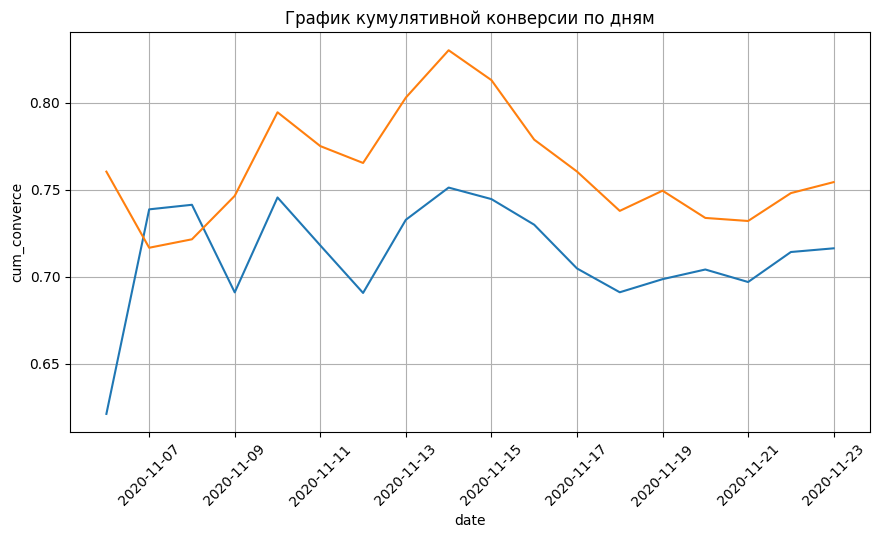

In [14]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])

# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_converce', data=daily_a, ax=ax)
sns.lineplot(x='date', y='cum_converce', data=daily_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

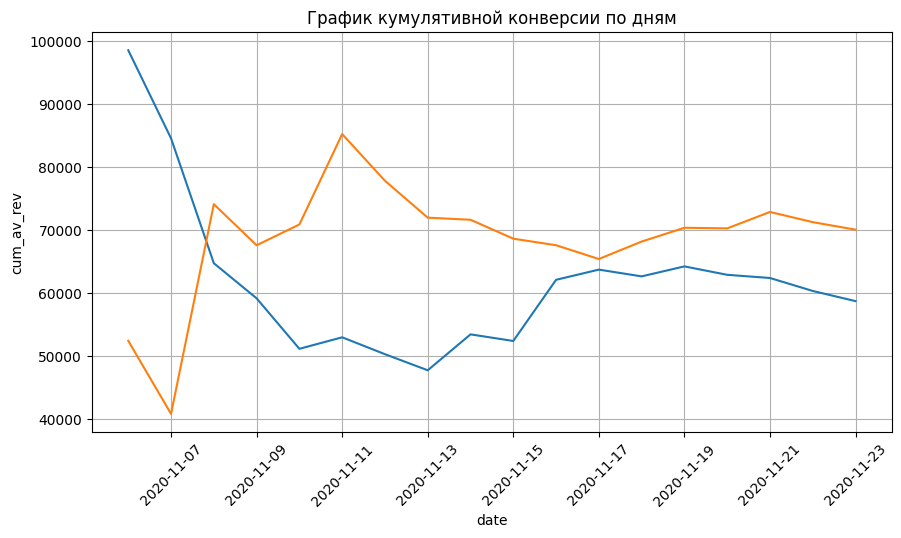

In [15]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])

# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_av_rev', data=daily_a, ax=ax)
sns.lineplot(x='date', y='cum_av_rev', data=daily_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [16]:
from statsmodels.stats.proportion import proportions_ztest

In [17]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [18]:
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61383 non-null  datetime64[ns]
 1   cid           61383 non-null  float64       
 2   transactions  61383 non-null  int64         
 3   revenue       61383 non-null  int64         
 4   group         61383 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [19]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=[sample_a['transactions'].sum(), sample_b['transactions'].sum()], #число "успехов"
    nobs=[sample_a.shape[0], sample_b.shape[0]], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.22
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [20]:
daily_a['av_rev'] = daily_a['revenue'] / daily_a['transactions']
daily_b['av_rev'] = daily_b['revenue'] / daily_b['transactions']

In [21]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(daily_a['av_rev'])
shapiro_result_b = shapiro(daily_b['av_rev'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.01
p-value группы B 0.02
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [22]:
daily_a

,date,user_count,transactions,revenue,cum_user_count,cum_transaction,cum_revenue,cum_converce,cum_av_rev,av_rev
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359,74864.608696
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000,33842.040000
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927,39379.444444
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450,28516.689655
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923,63666.105263
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141,31991.526316
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811,37189.333333
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860,88642.566667
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,52423.917355,44072.962963


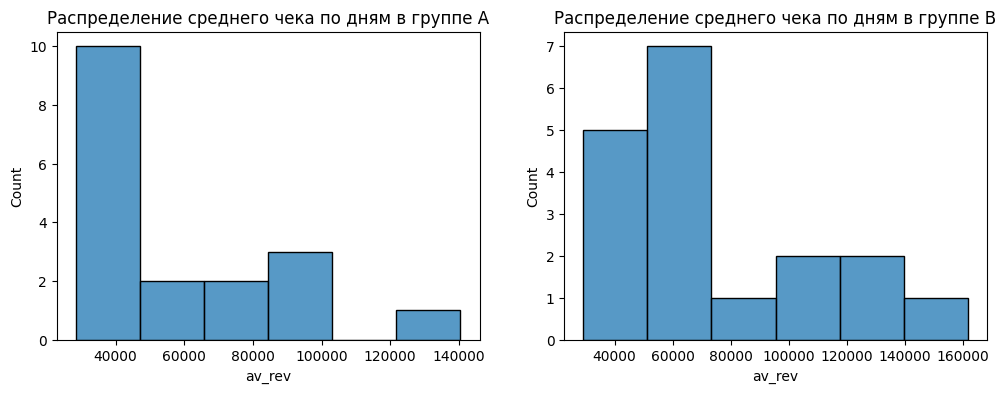

In [23]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(x=daily_a['av_rev'], data=daily_a['date'], ax=axes[0])
sns.histplot(x=daily_b['av_rev'], data=daily_b['date'], ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение среднего чека по дням в группе А');
axes[1].set_title('Распределение среднего чека по дням в группе B');

In [24]:
from scipy.stats import mannwhitneyu
# нулевая и альтернативная гипотезы
H0 = 'Ежедневные средние чеки в обеих группах равны'
H1 = 'Ежедневный средний чек в группе А меньше, чем в группе B'
alpha = 0.1 # уровень значимости
# вычисляем результат теста для выборок
_, p_value = mannwhitneyu(daily_a['av_rev'], 
                          daily_b['av_rev'], 
                          alternative='less')

print('p-value', round(p_value, 2))

# сравниваем полученное p-value с уровнем значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value 0.09
Отвергаем нулевую гипотезу. Ежедневные средние чеки в обеих группах равны
Альтернативная гипотеза. H1: Ежедневный средний чек в группе А меньше, чем в группе B


In [25]:
n = 189 # размер выборки
x_mean = 0.689 # выборочное среднее
sigma = 2.4 # истинное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound, 2), round(upper_bound, 2)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (0.4, 0.98)


In [26]:
n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное среднее
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (3146, 3934)


In [27]:
data = pd.read_csv('data/ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000
